In [ ]:
#install the libraries
#pip install tensorflow keras numpy matplotlib opencv-python

In [8]:
import pandas as pd
import numpy as np
import os
from PIL import Image

# Paths to CSV files
train_csv = "/home/arx/Projects/pfa/dataset/train/sign_mnist_train.csv"
test_csv = "/home/arx/Projects/pfa/dataset/test/sign_mnist_test.csv"

# Output directories
train_output_dir = "dataset/train"
test_output_dir = "dataset/test"

# Create directories if they don't exist
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

# Function to save images from CSV
def save_images_from_csv(csv_path, output_dir):
    data = pd.read_csv(csv_path)
    labels = data['label']
    images = data.drop('label', axis=1).values

    for i, (label, image) in enumerate(zip(labels, images)):
        label_dir = os.path.join(output_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)
        image_array = np.array(image, dtype=np.uint8).reshape(28, 28)  # MNIST images are 28x28
        img = Image.fromarray(image_array)
        img.save(os.path.join(label_dir, f"{i}.png"))

# Save train and test images
save_images_from_csv(train_csv, train_output_dir)
save_images_from_csv(test_csv, test_output_dir)

KeyboardInterrupt: 

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


/home/arx/Projects/pfa/pfaenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/arx/Projects/pfa/pfaenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.0873 - loss: 3.0546

/home/arx/Projects/pfa/pfaenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 378s 437ms/step - accuracy: 0.0873 - loss: 3.0544 - val_accuracy: 0.4686 - val_loss: 1.6898
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 304s 354ms/step - accuracy: 0.2772 - loss: 2.2091 - val_accuracy: 0.5851 - val_loss: 1.2389
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 493s 574ms/step - accuracy: 0.3873 - loss: 1.8436 - val_accuracy: 0.6887 - val_loss: 0.9721
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 578s 672ms/step - accuracy: 0.4507 - loss: 1.6339 - val_accuracy: 0.7571 - val_loss: 0.8541
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 305s 356ms/step - accuracy: 0.4905 - loss: 1.4951 - val_accuracy: 0.7744 - val_loss: 0.7900
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 117s 136ms/step - accuracy: 0.5222 - loss: 1.3992 - val_accuracy: 0.7540 - val_loss: 0.7113
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 112s 131ms/step - accuracy: 0.5506 - loss: 1.3213 - val_accuracy: 0.8146 - val_loss: 0.6661
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 112s 130ms/step - accuracy: 0.5673 - loss: 1.24

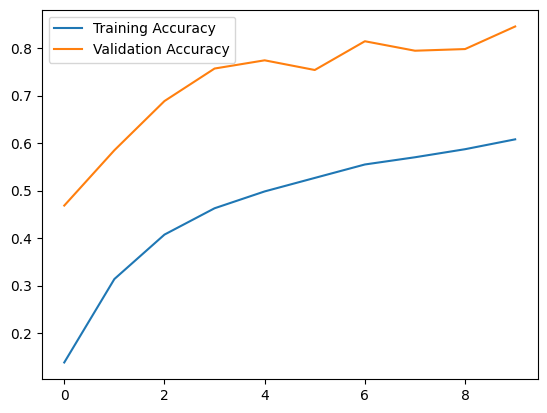

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0


In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths to your dataset
train_dir = "dataset/train"
test_dir = "dataset/test"

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Save the Model
model.save("sign_language_model.h5")

# Plot Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Test the Model on New Data
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_sign(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]
    return predicted_class

# Example usage
print(predict_sign("/home/arx/Projects/pfa/dataset/test/0/3.png"))

In [4]:
model.save("sign_language_model.h5")

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define a mapping from class indices to letters
index_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

def predict_sign(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_letter = index_to_letter[predicted_index]  # Map index to letter

    return predicted_letter

In [36]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("sign_language_model.h5")

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Define the mapping from class indices to letters
index_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q',
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# Load the trained model
model_path = "sign_language_model.h5"  # Path to your saved model
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file '{model_path}' not found. Please ensure the model is saved in the correct path.")

model = load_model(model_path)

# Function to predict the letter from an image
def predict_sign(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))  # Resize to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_letter = index_to_letter[predicted_index]  # Map index to letter

    return predicted_letter

# Example usage
image_path = "/home/arx/Projects/pfa/dataset/test/1/66.png"  # Replace with the path to your test image
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file '{image_path}' not found. Please ensure the image exists in the specified path.")

predicted_letter = predict_sign(image_path)
print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Letter: B
